In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math
import random

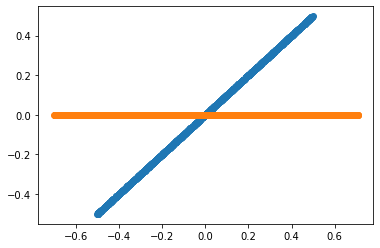

In [2]:
np.random.seed(21)

n = 1
x = np.random.uniform(1,2,1000)
y = x.copy() * n
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)
pca_tr = pca.fit(data)

rotated = pca_tr.transform(data)
data_pca = pd.DataFrame(data=rotated, columns=['PC1','PC2'])
plt.scatter(data_pca.PC1,data_pca.PC2)
plt.show()

In [3]:
print(pca_tr.components_)
print(pca_tr.explained_variance_ratio_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.00000000e+00 5.04184659e-31]


angle:  45.0
rotationMatrix
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


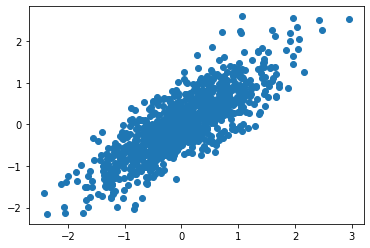

In [4]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

np.random.seed(100)

std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y

n = 1
angle = np.arctan(1 / n)
print('angle: ',  angle * 180 / math.pi)

rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],[-np.sin(angle), np.cos(angle)]])
print('rotationMatrix\n',rotationMatrix)

xy = np.concatenate(([x],[y]), axis=0).T
data2 = np.dot(xy, rotationMatrix)

plt.scatter(data2[:,0], data2[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Eigenvalues or explained variance
[1.70070332e-01 8.57468522e-32]


/var/folders/fx/m8jghh2j0xn7xvzxjj0rz1sr0000gn/T/ipykernel_13827/1059732677.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
/var/folders/fx/m8jghh2j0xn7xvzxjj0rz1sr0000gn/T/ipykernel_13827/1059732677.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')


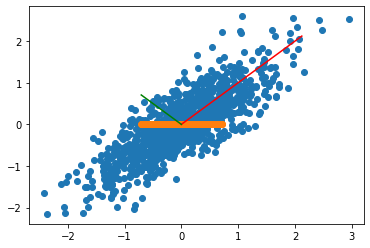

In [5]:
plt.scatter(data2[:,0], data2[:,1])

pca = PCA(n_components=2)
pcaTr = pca.fit(data)

dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

plt.scatter(dataPCA[:,0], dataPCA[:,1])
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

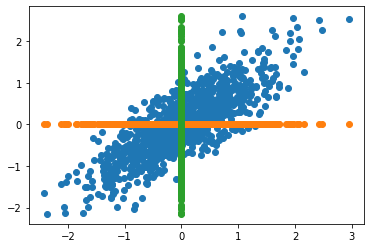

In [6]:
nPoints = len(data2)

# Plot the original data in blue
plt.scatter(data2[:,0], data2[:,1])

#Plot the projection along the first component in orange
plt.scatter(data2[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data2[:,1])

plt.show()